In [1]:
##Importing the Pandas Module
import pandas as pd

In [4]:
#Reading the yearly deaths dataset into yearly
yearly = pd.read_csv('C:/Users/Khush/Desktop/Datesets/Logistic Regression/Dr. Semmelweis and the Discovery of Handwashing/datasets/yearly_deaths_by_clinic.csv')

#Print yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


In [7]:
#Deaths per number of Briths
yearly['proportion_deaths'] = yearly.deaths.divide(yearly.births)
yearly1 = yearly[yearly.clinic == 'clinic 1']
yearly2 = yearly[yearly.clinic == 'clinic 2']
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


Text(0, 0.5, 'proportion_deaths')

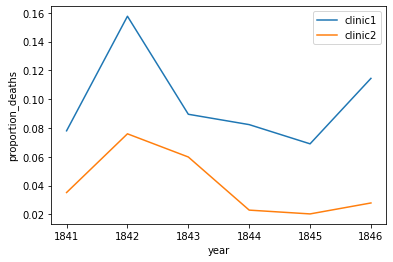

In [9]:
#Plotting the yearly proportion of deaths for both clinics
%matplotlib inline
ax = yearly1.plot( x='year' , y = 'proportion_deaths' , label = 'clinic1')
yearly2.plot ( x = 'year' , y = 'proportion_deaths' , label = 'clinic2' , ax=ax)
ax.set_ylabel('proportion_deaths')

In [13]:
#Reading monthly deaths dataset into monthly
monthly = pd.read_csv('C:/Users/Khush/Desktop/Datesets/Logistic Regression/Dr. Semmelweis and the Discovery of Handwashing/datasets/monthly_deaths.csv', parse_dates=['date'])

In [14]:
monthly [ 'proportion_deaths'] = monthly.deaths.divide(monthly.births)
print(monthly)
print(monthly.head())

         date  births  deaths  proportion_deaths
0  1841-01-01     254      37           0.145669
1  1841-02-01     239      18           0.075314
2  1841-03-01     277      12           0.043321
3  1841-04-01     255       4           0.015686
4  1841-05-01     255       2           0.007843
..        ...     ...     ...                ...
93 1848-11-01     310       9           0.029032
94 1848-12-01     373       5           0.013405
95 1849-01-01     403       9           0.022333
96 1849-02-01     389      12           0.030848
97 1849-03-01     406      20           0.049261

[98 rows x 4 columns]
        date  births  deaths  proportion_deaths
0 1841-01-01     254      37           0.145669
1 1841-02-01     239      18           0.075314
2 1841-03-01     277      12           0.043321
3 1841-04-01     255       4           0.015686
4 1841-05-01     255       2           0.007843


Text(0, 0.5, 'proportion_deaths')

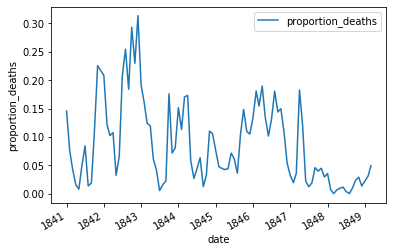

In [15]:
#Plot the monthly proportion of deaths for Clinic 1
ax = monthly.plot ( x = 'date' , y = 'proportion_deaths')
ax.set_ylabel ('proportion_deaths')

Text(0, 0.5, 'proportion_deaths')

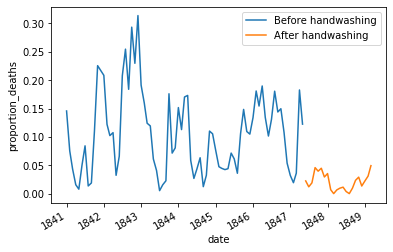

In [17]:
#Plot to highligh the effects of handwashing
#Handwashing start date = 1847-06-01
handwashing_start = pd.to_datetime('1847-06-01')

#Split the variable monthly into start and before of handwashing
before_washing = monthly [monthly.date < handwashing_start]
after_washing = monthly [monthly.date >= handwashing_start]

#Plotting monthly propoertion of deaths before and after washing
ax = before_washing.plot ( x = 'date' , y='proportion_deaths', label='Before handwashing') 
after_washing.plot( x = 'date' , y='proportion_deaths', label='After handwashing' , ax = ax)
ax.set_ylabel('proportion_deaths')


In [23]:
# Average reduction in proportion of deaths due to handwashing
before_proportion = before_washing.proportion_deaths
after_proportion = after_washing.proportion_deaths
mean_diff = after_proportion.mean() - before_proportion.mean()
print(mean_diff)

-0.0839566075118334


In [27]:
#Bootstrap analysis of the difference in mean monthly proportion of deaths
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())



In [31]:
# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

0.025   -0.101568
0.975   -0.067290
dtype: float64


In [ ]:
#Given the data, it is TRUE that doctors should wash their hands as accoring to 95% confidence interval, handwashing reduced the deaths proportion to 6 to 10 percentage points.